<a id="ref2"></a>
<h2>How does TensorFlow work?</h2>
TensorFlow defines computations as Graphs, and these are made with operations (also know as “ops”). So, when we work with TensorFlow, it is the same as defining a series of operations in a Graph.

To execute these operations as computations, we must launch the Graph into a Session. The session translates and passes the operations represented into the graphs to the device you want to execute them on, be it a GPU or CPU. In fact, TensorFlow's capability to execute the code on different devices such as CPUs and GPUs is a consequence of it's specific structure.

For example, the image below represents a graph in TensorFlow. <b>W</b>, <b>x</b> and b are tensors over the edges of this graph. <b>MatMul</b> is an operation over the tensors <b>W</b> and <b>x</b>, after that <b>Add</b> is called and add the result of the previous operator with <b>b</b>. The resultant tensors of each operation cross the next one until the end where it's possible to get the wanted result.

<img src='https://ibm.box.com/shared/static/a94cgezzwbkrq02jzfjjljrcaozu5s2q.png'>

In [9]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


<h3>What is the meaning of Tensor?</h3>

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>In TensorFlow all data is passed between operations in a computation graph, and these are passed in the form of Tensors, hence the name of TensorFlow.</strong></font>
<br>
<br>
    The word <b>tensor</b> from new latin means "that which stretches". It is a mathematical object that is named "tensor" because an early application of tensors was the study of materials stretching under tension. The contemporary meaning of tensors can be taken as multidimensional arrays. 



</div>

That's great, but... what are these multidimensional arrays? 

Going back a little bit to physics to understand the concept of dimensions:<br>
<img src="https://ibm.box.com/shared/static/ymn0hl3hf8s3xb4k15v22y5vmuodnue1.svg"/>
<div style="text-align:center"><a href="https://en.wikipedia.org/wiki/Dimension">Image Source</a></div>
<br>

The zero dimension can be seen as a point, a single object or a single item.

The first dimension can be seen as a line, a one-dimensional array can be seen as numbers along this line, or as points along the line. One dimension can contain infinite zero dimension/points elements.

The second dimension can be seen as a surface, a two-dimensional array can be seen as an infinite series of lines along an infinite line. 

The third dimension can be seen as volume, a three-dimensional array can be seen as an infinite series of surfaces along an infinite line.

The Fourth dimension can be seen as the hyperspace or spacetime, a volume varying through time, or an infinite series of volumes along an infinite line. And so forth on...

As mathematical objects: <br><br>
<img src="https://ibm.box.com/shared/static/kmxz570uai8eeg6i6ynqdz6kmlx1m422.png">
<div style="text-align: center"><a href="https://book.mql4.com/variables/arrays">Image Source</a></div>

Summarizing:<br><br>
<table style="width:100%">
  <tr>
    <td><b>Dimension</b></td>
    <td><b>Physical Representation</b></td> 
    <td><b>Mathematical Object</b></td>
    <td><b>In Code</b></td>
  </tr>
  
  <tr>
    <td>Zero </td>
    <td>Point</td> 
    <td>Scalar (Single Number)</td>
    <td>[ 1 ]</td>
  </tr>

  <tr>
    <td>One</td>
    <td>Line</td> 
    <td>Vector (Series of Numbers) </td>
    <td>[ 1,2,3,4,... ]</td>
  </tr>
  
   <tr>
    <td>Two</td>
    <td>Surface</td> 
    <td>Matrix (Table of Numbers)</td>
       <td>[ [1,2,3,4,...], [1,2,3,4,...], [1,2,3,4,...],... ]</td>
  </tr>
  
   <tr>
    <td>Three</td>
    <td>Volume</td> 
    <td>Tensor (Cube of Numbers)</td>
    <td>[ [[1,2,...], [1,2,...], [1,2,...],...], [[1,2,...], [1,2,...], [1,2,...],...], [[1,2,...], [1,2,...], [1,2,...] ,...]... ]</td>
  </tr>
  
</table>


## Defining Graphs using TensorFlow

As we said before, TensorFlow works as a graph computational model. Let's create our first graph which we named as <b>graph1</b>.

Now we call the TensorFlow functions that construct new <b>tf.Operation</b> and <b>tf.Tensor</b> objects and add them to the <b>graph1</b>. As mentioned, each <b>tf.Operation</b> is a <b>node</b> and each <b>tf.Tensor</b> is an edge in the graph.

Lets add 2 constants to our graph. For example, calling tf.constant([2], name = 'constant_a') adds a single <b>tf.Operation</b> to the default graph. This operation produces the value 2, and returns a <b>tf.Tensor</b> that represents the value of the constant.  
<b>Notice:</b> tf.constant([2], name="constant_a") creates a new tf.Operation named "constant_a" and returns a tf.Tensor named "constant_a:0"

In [11]:
graph1 = tf.Graph()

with graph1.as_default():
    a = tf.constant([2], name = 'constant_a')
    b = tf.constant([3], name = 'constant_b')
    
# Printing the value of a
sess = tf.Session(graph = graph1)
result = sess.run(a)
print(result)
sess.close()

[2]


In this example, we see the easiest tf operation. 

We first defined a graph, as all operations we execute are defined through graphs. 

We then defined two constants and named them "constant a" and "b", respectively. 

Then, we defined a session based on the applied graph. 

Lastly, we ran the session and printed the result, before closing it again. 

In [12]:
with graph1.as_default():
    c = tf.add(a,b)

sess = tf.Session(graph = graph1)
result = sess.run(c)
print(result)
sess.close()

[5]


Now, we followed the same procedure, but we introduced a different operation: addition. 

Again, we: 

- introduced a graph as default
- added an operation 
- introduced a session based on the graph
- ran and printed the result 
- closed the session

<a id="ref4"></a>
<h2>Defining multidimensional arrays using TensorFlow</h2>
Now we will try to define such arrays using TensorFlow:

In [15]:
graph2 = tf.Graph()
with graph2.as_default():
    Scalar = tf.constant(2)
    Vector = tf.constant([5,6,2])
    Matrix = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
    Matrix_two = tf.constant([[1,2,5],[4,2,4],[8,4,1]])
    Tensor = tf.constant( [ [[1,2,3],[2,3,4],[3,4,5]] , [[4,5,6],[5,6,7],[6,7,8]] , [[7,8,9],[8,9,10],[9,10,11]] ] )
    
    mul_operation = tf.matmul(Matrix, Matrix_two)
    
with tf.Session(graph = graph2) as sess:
    result = sess.run(Scalar)
    print ("Scalar (1 entry):\n %s \n" % result)
    result = sess.run(Vector)
    print ("Vector (3 entries) :\n %s \n" % result)
    result = sess.run(Matrix)
    print ("Matrix (3x3 entries):\n %s \n" % result)
    result = sess.run(Tensor)
    print ("Tensor (3x3x3 entries) :\n %s \n" % result)
    result = sess.run(mul_operation)
    print ("Defined using tensorflow function :")
    print(result)

Scalar (1 entry):
 2 

Vector (3 entries) :
 [5 6 2] 

Matrix (3x3 entries):
 [[1 2 3]
 [2 3 4]
 [3 4 5]] 

Tensor (3x3x3 entries) :
 [[[ 1  2  3]
  [ 2  3  4]
  [ 3  4  5]]

 [[ 4  5  6]
  [ 5  6  7]
  [ 6  7  8]]

 [[ 7  8  9]
  [ 8  9 10]
  [ 9 10 11]]] 

Defined using tensorflow function :
[[33 18 16]
 [46 26 26]
 [59 34 36]]


Here, we see the same procedure again: 

- Define a graph in which we store our data as well as the operations
- Define a session in which the session is run 

<a id="ref5"></a>
<h2>Why Tensors?</h2>

The Tensor structure helps us by giving the freedom to shape the dataset in the way we want.

And it is particularly helpful when dealing with images, due to the nature of how information in images are encoded,

Thinking about images, its easy to understand that it has a height and width, so it would make sense to represent the information contained in it with a two dimensional structure (a matrix)... until you remember that images have colors, and to add information about the colors, we need another dimension, and thats when Tensors become particularly helpful.

Images are encoded into color channels, the image data is represented into each color intensity in a color channel at a given point, the most common one being RGB, which means Red, Blue and Green. The information contained into an image is the intensity of each channel color into the width and height of the image, just like this:

<img src='https://ibm.box.com/shared/static/xlpv9h5xws248c09k1rlx7cer69y4grh.png'>
<a href="https://msdn.microsoft.com/en-us/library/windows/desktop/dn424131.aspx">Image Source</a>

So the intensity of the red channel at each point with width and height can be represented into a matrix, the same goes for the blue and green channels, so we end up having three matrices, and when these are combined they form a tensor. 


<a id="ref6"></a>
# Variables

Now that we are more familiar with the structure of data, we will take a look at how TensorFlow handles variables.
<b>First of all, having tensors, why do we need variables?</b>  
TensorFlow variables are used to share and persistent some stats that are manipulated by our program. That is, when you define a variable, TensorFlow adds a <b>tf.Operation</b> to your graph. Then, this operation will store a writable tensor value that persists between tf.Session.run calls. So, you can update the value of a variable through each run, while you cannot update tensor (e.g a tensor created by tf.constant()) through multiple runs in a session. 

<b>How to define a variable?</b>  
To define variables we use the command <b>tf.Variable()</b>.
To be able to use variables in a computation graph it is necessary to initialize them before running the graph in a session. This is done by running <b>tf.global_variables_initializer()</b>.

To update the value of a variable, we simply run an assign operation that assigns a value to the variable:

In [16]:
v = tf.Variable(0)

Let's first create a simple counter, a variable that increases one unit at a time:

To do this we use the <b>tf.assign(reference_variable, value_to_update)</b> command. <b>tf.assign</b> takes in two arguments, the <b>reference_variable</b> to update, and assign it to the <b>value_to_update</b> it by.

In [23]:
update = tf.assign(v, (v+1)*3)

Variables must be initialized by running an initialization operation after having launched the graph.  We first have to add the initialization operation to the graph:

In [24]:
init_op = tf.global_variables_initializer()

We then start a session to run the graph, first initialize the variables, then print the initial value of the <b>state</b> variable, and then run the operation of updating the <b>state</b> variable and printing the result after each update:

In [25]:
with tf.Session() as session:
    session.run(init_op)
    print(session.run(v))
    for _ in range(12):
        session.run(update)
        print(session.run(v))

0
3
12
39
120
363
1092
3279
9840
29523
88572
265719
797160


<a id="ref7"></a>
# Placeholders

Now we know how to manipulate variables inside TensorFlow graph, but what about feeding data outside of a TensorFlow graph? 

If you want to feed data to a TensorFlow graph from outside a graph, you will need to use placeholders.

So <b>what are these placeholders and what do they do?</b> 

Placeholders can be seen as "holes" in your model, "holes" which you will pass the data to, you can create them using <br> <b>tf.placeholder(_datatype_)</b>, where <b>_datatype_</b> specifies the type of data (integers, floating points, strings, booleans) along with its precision (8, 16, 32, 64) bits.

The definition of each data type with the respective python syntax is defined as:

|Data type	|Python type|Description|
| --------- | --------- | --------- |
|DT_FLOAT	|tf.float32	|32 bits floating point.|
|DT_DOUBLE	|tf.float64	|64 bits floating point.|
|DT_INT8	|tf.int8	|8 bits signed integer.|
|DT_INT16	|tf.int16	|16 bits signed integer.|
|DT_INT32	|tf.int32	|32 bits signed integer.|
|DT_INT64	|tf.int64	6|4 bits signed integer.|
|DT_UINT8	|tf.uint8	|8 bits unsigned integer.|
|DT_STRING	|tf.string	|Variable length byte arrays. Each element of a Tensor is a byte array.|
|DT_BOOL	|tf.bool	|Boolean.|
|DT_COMPLEX64	|tf.complex64	|Complex number made of two 32 bits floating points: real and imaginary parts.|
|DT_COMPLEX128	|tf.complex128	|Complex number made of two 64 bits floating points: real and imaginary parts.|
|DT_QINT8	|tf.qint8	|8 bits signed integer used in quantized Ops.|
|DT_QINT32	|tf.qint32	|32 bits signed integer used in quantized Ops.|
|DT_QUINT8	|tf.quint8	|8 bits unsigned integer used in quantized Ops.|


In [35]:
# Defining  a placeholder & a simple multiplication

a = tf.placeholder(tf.float32)
b = a * 2

Now we need to define and run the session, but since we created a "hole" in the model to pass the data, when we initialize the session we are obligated to pass an argument with the data, otherwise we would get an error.

To pass the data into the model we call the session with an extra argument <b>feed_dict</b> in which we should pass a dictionary with each placeholder name followed by its respective data, just like this:

In [37]:
with tf.Session() as sess:
    result = sess.run(b,feed_dict={a:3.5})
    print(result)

7.0


In [38]:
dictionary={a: [ [ [1,2,3],[4,5,6],[7,8,9],[10,11,12] ] , [ [13,14,15],[16,17,18],[19,20,21],[22,23,24] ] ] }

with tf.Session() as sess: 
    result = sess.run(b, feed_dict = dictionary)
    print(result)

[[[ 2.  4.  6.]
  [ 8. 10. 12.]
  [14. 16. 18.]
  [20. 22. 24.]]

 [[26. 28. 30.]
  [32. 34. 36.]
  [38. 40. 42.]
  [44. 46. 48.]]]


<a id="ref8"></a>

## Operations

Operations are nodes that represent the mathematical operations over the tensors on a graph. These operations can be any kind of functions, like add and subtract tensor or maybe an activation function.

<b>tf.constant</b>, <b>tf.matmul</b>, <b>tf.add</b>, <b>tf.nn.sigmoid</b> are some of the operations in TensorFlow. These are like functions in python but operate directly over tensors and each one does a specific thing. 
<div class="alert alert-success alertsuccess" style="margin-top: 20px">Other operations can be easily found in: <a href="https://www.tensorflow.org/versions/r0.9/api_docs/python/index.html">https://gist.github.com/dustinvtran/cf34557fb9388da4c9442ae25c2373c9</a></div>

In [47]:
graph5 = tf.Graph()
with graph5.as_default():
    a = tf.constant([5])
    b = tf.constant([2])
    c = tf.add(a,b)
    d = tf.subtract(a,b)

with tf.Session(graph = graph5) as sess:
    result = sess.run(c)
    print ('c =: %s' % result)
    result = sess.run(d)
    print ('d =: %s' % result)
    

c =: [7]
d =: [3]


<a id="ref1"></a>
<h1>Linear Regression</h1>

Defining a linear regression in simple terms, is the approximation of a linear model used to describe the relationship between two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the "state" or "final goal" that we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the "causes" of the "states". 

When more than one independent variable is present the process is called multiple linear regression. <br>
When multiple dependent variables are predicted the process is known as multivariate linear regression.

The equation of a simple linear model is

$$Y = a X + b $$

Where Y is the dependent variable and X is the independent variable, and <b>a</b> and <b>b</b> being the parameters we adjust. <b>a</b> is known as "slope" or "gradient" and <b>b</b> is the "intercept". You can interpret this equation as Y being a function of X, or Y being dependent on X.

If you plot the model, you will see it is a line, and by adjusting the "slope" parameter you will change the angle between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable's axis.

Let's first import the required packages:

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [58]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-09-07 11:17:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70,93K   364KB/s    in 0,2s    

2020-09-07 11:17:22 (364 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [60]:
fc = pd.read_csv("FuelConsumption.csv")

Lets say we want to use linear regression to predict Co2Emission of cars based on their engine size. So, lets define X and Y value for the linear regression, that is, train_x and train_y:

In [62]:
train_x = np.asanyarray(fc[["ENGINESIZE"]])
train_y = np.asanyarray(fc[["CO2EMISSIONS"]])

First, we initialize the variables <b>a</b> and <b>b</b>, with any random guess, and then we define the linear function:

In [65]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

Now, we are going to define a loss function for our regression, so we can train our model to better fit our data. In a linear regression, we minimize the squared error of the difference between the predicted values(obtained from the equation) and the target values (the data that we have). In other words we want to minimize the square of the predicted values minus the target value. So we define the equation to be minimized as loss.

To find value of our loss, we use <b>tf.reduce_mean()</b>. This function finds the mean of a multidimensional tensor, and the result can have a different dimension.

In [82]:
loss = tf.reduce_mean(tf.square(y - train_y))

Then, we define the optimizer method. The gradient Descent optimizer takes in parameter: learning rate, which corresponds to the speed with which the optimizer should learn; there are pros and cons for increasing the learning-rate parameter, **with a high learning rate the training model converges quickly, but there is a risk that a high learning rate causes instability and the model will not converge**. On the other hand decreasing the learning rate might reduce the convergence speed, but it would increase the chance of converging to a solution. You should note that the **solution might not be a global optimal solution as there is a chance that the optimizer will get stuck in a local optimal solution.**

Here we will use a simple gradient descent with a learning rate of 0.05: <br>  

In [75]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

In [76]:
train = optimizer.minimize(loss)

In [77]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Now we are ready to start the optimization and run the graph:


In [78]:
loss_values = []
train_data = []

for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 26992.592 20.0 30.2
5 1891.721 59.76378 47.59573
10 1762.7241 57.911816 51.973316
15 1653.5896 56.615788 57.051537
20 1559.0438 55.404785 61.776962
25 1477.1368 54.277676 66.17523
30 1406.1787 53.2286 70.269
35 1344.7058 52.252155 74.07933
40 1291.4507 51.343315 77.625854
45 1245.3142 50.4974 80.92684
50 1205.3451 49.71005 83.99929
55 1170.7189 48.977207 86.85902
60 1140.7213 48.29511 89.520744
65 1114.734 47.660236 91.998184
70 1092.2202 47.069317 94.3041
75 1072.7162 46.51931 96.45037
80 1055.8192 46.00738 98.44805
85 1041.181 45.530895 100.30742
90 1028.4998 45.0874 102.038055
95 1017.5135 44.67461 103.64887


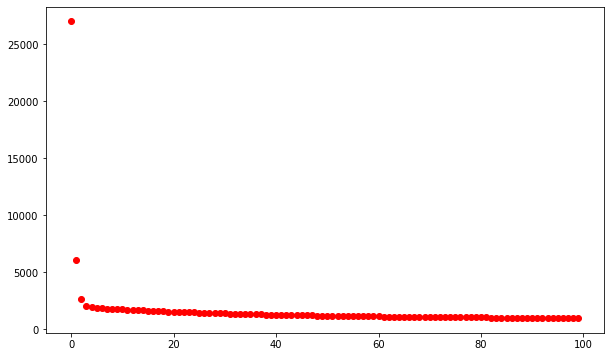

In [79]:
plt.plot(loss_values, 'ro')

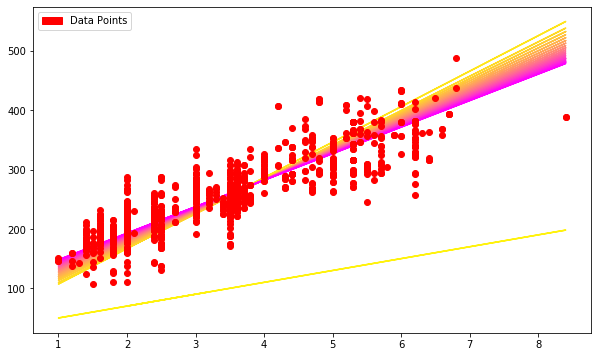

In [80]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

<a id="ref1"></a>
<h2>What is different between Linear and Logistic Regression?</h2>

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is n0t the best tool for predicting the class in which an observed data point belongs. In order to provide estimate for classification, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size="3"><strong>Recall linear regression:</strong></font>
<br>
<br>
Linear regression finds a function that relates a continuous dependent variable, <i>y</i>, to some predictors (independent variables <i>x1</i>, <i>x2</i>, etc.). Simple linear regression assumes a function of the form:
<br><br>
$$
y = w0 + w1 \times x1 + w2 \times x2 + \cdots
$$
<br>
and finds the values of <i>w0</i>, <i>w1</i>, <i>w2</i>, etc. The term <i>w0</i> is the "intercept" or "constant term" (it's shown as <i>b</i> in the formula below):
<br><br>
$$
Y = W X + b
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <i>y</i>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Despite the name logistic <i>regression</i>, it is actually a <b>probabilistic classification</b> model. Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function:

$$
ProbabilityOfaClass = \theta(y) = \frac{e^y}{1 + e^y} = exp(y) / (1 + exp(y)) = p 
$$

which produces p-values between 0 (as y approaches minus infinity $-\infty$) and 1 (as y approaches plus infinity $+\infty$). This now becomes a special kind of non-linear regression.

In this equation, <i>y</i> is the regression result (the sum of the variables weighted by the coefficients), <code>exp</code> is the exponential function and $\theta(y)$ is the <a href="http://en.wikipedia.org/wiki/Logistic_function">logistic function</a>, also called logistic curve. It is a common "S" shape (sigmoid curve), and was first developed for modeling population growth.

You might also have seen this function before, in another configuration:

$$
ProbabilityOfaClass = \theta(y) = \frac{1}{1+e^{-y}}
$$

So, briefly, Logistic Regression passes the input through the logistic/sigmoid function but then treats the result as a probability:

<img src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">


<a id="ref2"></a>
<h2>Utilizing Logistic Regression in TensorFlow</h2>

For us to utilize Logistic Regression in TensorFlow, we first need to import the required libraries. To do so, you can run the code cell below.

In [84]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [86]:
iris = load_iris()

In [96]:
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y= pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

Now we define x and y. These placeholders will hold our iris data (both the features and label matrices), and help pass them along to different parts of the algorithm. You can consider placeholders as empty shells into which we insert our data. We also need to give them shapes which correspond to the shape of our data. Later, we will insert data into these placeholders by “feeding” the placeholders the data via a “feed_dict” (Feed Dictionary).

<h3>Why use Placeholders?</h3>

<ol>
    <li>This feature of TensorFlow allows us to create an algorithm which accepts data and knows something about the shape of the data without knowing the amount of data going in.</li>
    <li>When we insert “batches” of data in training, we can easily adjust how many examples we train on in a single step without changing the entire algorithm.</li>
</ol>

In [97]:
# numFeatures is the number of features in our input data.
# In the iris dataset, this number is '4'.
numFeatures = trainX.shape[1]

# numLabels is the number of classes our data points can be in.
# In the iris dataset, this number is '3'.
numLabels = trainY.shape[1]


# Placeholders
# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
X = tf.placeholder(tf.float32, [None, numFeatures]) # Iris has 4 features, so X is a tensor to hold our data.
yGold = tf.placeholder(tf.float32, [None, numLabels]) # This will be our correct answers matrix for 3 classes.

<h3>Set model weights and bias</h3>

Much like Linear Regression, we need a shared variable weight matrix for Logistic Regression. We initialize both <code>W</code> and <code>b</code> as tensors full of zeros. Since we are going to learn <code>W</code> and <code>b</code>, their initial value does not matter too much. These variables are the objects which define the structure of our regression model, and we can save them after they have been trained so we can reuse them later.

We define two TensorFlow variables as our parameters. These variables will hold the weights and biases of our logistic regression and they will be continually updated during training. 

Notice that <code>W</code> has a shape of [4, 3] because we want to multiply the 4-dimensional input vectors by it to produce 3-dimensional vectors of evidence for the difference classes. <code>b</code> has a shape of [3] so we can add it to the output. Moreover, unlike our placeholders above which are essentially empty shells waiting to be fed data, TensorFlow variables need to be initialized with values, e.g. with zeros.

In [98]:
W = tf.Variable(tf.zeros([4, 3]))  # 4-dimensional input and  3 classes
b = tf.Variable(tf.zeros([3])) # 3-dimensional output [0,0,1],[0,1,0],[1,0,0]

In [99]:
#Randomly sample from a normal distribution with standard deviation .01

weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.01,
                                       name="weights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=0.01,
                                    name="bias"))

<h3>Logistic Regression model</h3>

We now define our operations in order to properly run the Logistic Regression. Logistic regression is typically thought of as a single equation:

$$
ŷ =sigmoid(WX+b)
$$

However, for the sake of clarity, we can have it broken into its three main components: 
- a weight times features matrix multiplication operation, 
- a summation of the weighted features and a bias term, 
- and finally the application of a sigmoid function. 

As such, you will find these components defined as three separate operations below.


In [100]:
# Three-component breakdown of the Logistic Regression equation.
# Note that these feed into each other.

apply_weights_OP = tf.matmul(X, weights, name = "apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name = "add_bias")
activation_OP = tf.nn.sigmoid(add_bias_OP, name = "activation")

<a id="ref3"></a>
<h2>Training</h2>

The learning algorithm is how we search for the best weight vector (${\bf w}$). This search is an optimization problem looking for the hypothesis that optimizes an error/cost measure.

<b>What tell us our model is bad?</b>  
The Cost or Loss of the model, so what we want is to minimize that. 

<b>What is the cost function in our model?</b>  
The cost function we are going to utilize is the Squared Mean Error loss function.

<b>How to minimize the cost function?</b>   
We can't use <b>least-squares linear regression</b> here, so we will use <a href="http://en.wikipedia.org/wiki/Gradient_descent">gradient descent</a> instead. Specifically, we will use batch gradient descent which calculates the gradient from all data points in the data set.

<h3>Cost function</h3>
Before defining our cost function, we need to define how long we are going to train and how should we define the learning rate.

In [101]:
# Number of Epochs in our training
numEpochs = 700

# Defining our learning rate iterations (decay)
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [102]:
cost_OP = tf.nn.l2_loss(activation_OP - yGold, name = "mean_squared_error_cost")

training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

Now we move on to actually running our operations. We will start with the operations involved in the prediction phase (i.e. the logistic regression itself).

First, we need to initialize our weights and biases with zeros or random values via the inbuilt Initialization Op, <b>tf.initialize_all_variables()</b>. This Initialization Op will become a node in our computational graph, and when we put the graph into a session, then the Op will run and create the variables.

In [103]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

We also want some additional operations to keep track of our model's efficiency over time. We can do this like so:

In [104]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)

# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

In [105]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, yGold: trainY})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

step 0, training accuracy 0.333333, cost 34.6815, change in cost 34.6815
step 10, training accuracy 0.606061, cost 29.9619, change in cost 4.7196
step 20, training accuracy 0.646465, cost 28.0366, change in cost 1.92536
step 30, training accuracy 0.646465, cost 26.413, change in cost 1.62352
step 40, training accuracy 0.646465, cost 25.0645, change in cost 1.34859
step 50, training accuracy 0.646465, cost 23.9503, change in cost 1.11415
step 60, training accuracy 0.646465, cost 23.0279, change in cost 0.922443
step 70, training accuracy 0.646465, cost 22.2591, change in cost 0.768774
step 80, training accuracy 0.646465, cost 21.6126, change in cost 0.646441
step 90, training accuracy 0.646465, cost 21.0636, change in cost 0.548994
step 100, training accuracy 0.666667, cost 20.5927, change in cost 0.470989
step 110, training accuracy 0.666667, cost 20.1846, change in cost 0.408089
step 120, training accuracy 0.666667, cost 19.8276, change in cost 0.356943
step 130, training accuracy 0.6

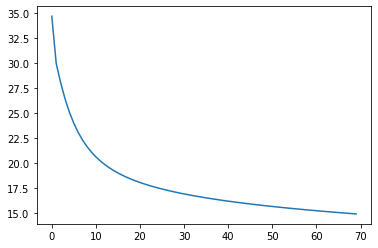

In [109]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(cost_values[i]) for i in range(len(cost_values))])
plt.show()